# Example of unsupervised Learning - Clustering 

Example of clustering using PCA and tSNE, data from: https://www.kaggle.com/competitions/digit-recognizer/data

This is a very common excersize for dimension reduction using PCA  and tSNE.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

## Read the data

Reading the data from .csv file and inspection the format and dimensions

In [4]:
d0 = pd.read_csv('./data/train.csv').values


In [79]:
print(d0[:,0])

[1 0 1 ... 7 6 9]


Separating labels and data

In [7]:
l = d0[:,0]
d = d0[:, 1:]


## Visualizing the data

In [8]:
print(d[100].shape)
x = d[100].reshape(28,28)
print(x)


(784,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  62 176 254
  254 228  38   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   4  87 204 245 253 171
  140 254 192   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  21 128 220 253

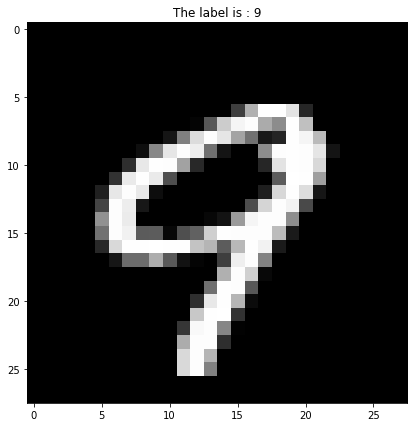

In [13]:
idx = 100
plt.figure(figsize = (7,7))
grid_data = d[idx].reshape(28,28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.title("The label is : {}".format(l[idx]))
plt.show()

Check the dimensions

In [85]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


## Prepare the dataset for training

cutting down the numbers for speed

In [18]:
data = d[:15000]
labels= l[:15000]
print(data.shape)

(15000, 784)


## Data pre-processing

Standardize/Normalize the data

In [19]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


Compute the covariance matrix : https://en.wikipedia.org/wiki/Covariance_matrix

In [20]:
covar_matrix = np.matmul(standardized_data.T, standardized_data)
print(covar_matrix.shape)

(784, 784)


Compute the eigenvalues and eigen vectors

In [22]:
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, eigvals=(782,783))
vectors = vectors.T
print(vectors.shape)

(2, 784)


## Data transformation

Map the data into the new 2D space

In [24]:
new_data = np.matmul(vectors, data.T)
print("Data shape was {} and is now {}".format(data.T.shape, new_data.shape))

Data shape was (784, 15000) and is now (2, 15000)


## Visualization the dimensionally reduced data

In [27]:
new_coordinates = np.vstack((new_data, labels)).T
print(new_coordinates.shape)
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st P", "2nd P", "labels"))
print(dataframe.head(10))

(15000, 3)
        1st P        2nd P  labels
0 -563.464224   138.182139     1.0
1  369.459961  2322.837978     0.0
2 -267.642796  -111.383962     1.0
3  298.572206   544.382757     4.0
4  344.880706  2743.736740     0.0
5 -105.919355   829.330437     0.0
6  426.781473    30.654211     7.0
7  242.207861   570.654377     3.0
8 -135.700663   618.320277     5.0
9 -377.698484   900.269219     3.0


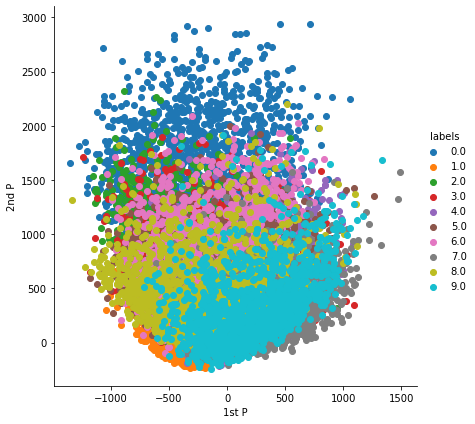

In [28]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="labels", height=6).map(plt.scatter, '1st P', '2nd P').add_legend()
plt.show()

## Using Sklearn for PCA

PCA is available with ready to use methods in sklearn. We dont have to do it manually.

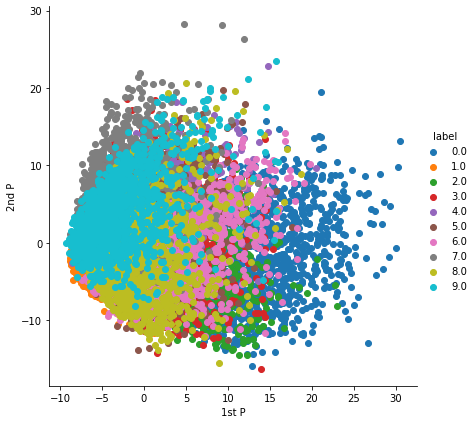

In [33]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

pca_data = np.vstack((pca_data.T, labels)).T
pca_dataframe = pd.DataFrame(data=pca_data, columns=("1st P", "2nd P", "label"))

sn.FacetGrid(pca_dataframe, hue="label", height=6).map(plt.scatter, '1st P', '2nd P').add_legend()
plt.show()

We can check how much of variance is preserved when reducing the data

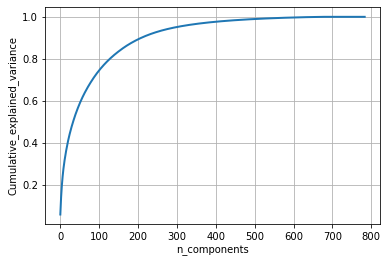

In [36]:
pca.n_components = 784
pca_data = pca.fit_transform(standardized_data)
variance_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
sum_var_explained = np.cumsum(variance_explained)

plt.figure(1, figsize= (6,4))
plt.clf()
plt.plot(sum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

### This shows why PCA plot does not look so good. Only around 20% of variance can be explained.

# Applying t-SNE for dimension reduction

The algorithm and methods are available from sklearn library : https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

We start by small number of points and to find good values for the hyper-parameters like iteration and perplexity. We can try the cell below for different values of these two parameters and check the results.

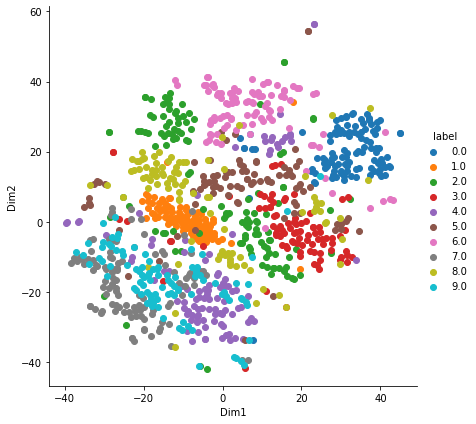

In [43]:
from sklearn.manifold import TSNE
data_1000 = standardized_data[:1000,:]
labels_1000 = labels[:1000]
model = TSNE(n_components = 2, random_state = 0, perplexity = 50, n_iter=10000)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns = ("Dim1", "Dim2", "label"))

sn.FacetGrid(tsne_df, hue = "label", height= 6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

## Using larger dataset for training.

Now we try this on all of our data. This may take longer time....
Unfortunately, it seems that sklearn cannot utilize GPU.

Shape of input data : (42000, 784)


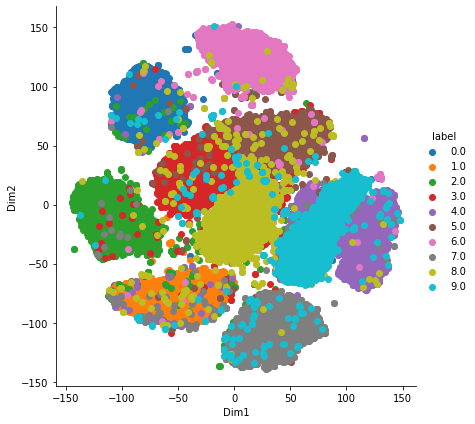

In [47]:
data = d
labels= l
standardized_data = StandardScaler().fit_transform(data)
print("Shape of input data : {}".format(standardized_data.shape))

model = TSNE(n_components = 2, random_state = 0, perplexity = 50, n_iter=5000)
tsne_data = model.fit_transform(data)
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data = tsne_data, columns = ("Dim1", "Dim2", "label"))

#ploting
sn.FacetGrid(tsne_df, hue = "label", height= 6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()


### This looks much better than PCA!